In [1]:
# single

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 50,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 3
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\tcumi\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


Checkpoint 100, Accuracy: 0.9197530864197531, Loss: 0.3776601155598958
Checkpoint 200, Accuracy: 0.9012345679012346, Loss: 0.35129261016845703
Checkpoint 300, Accuracy: 0.9012345679012346, Loss: 0.3346393726490162
Checkpoint 400, Accuracy: 0.9012345679012346, Loss: 0.3208027592411748
Checkpoint 500, Accuracy: 0.9382716049382716, Loss: 0.30230511559380424


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.91568595 0.04709861 0.03721547]
[0. 0. 1.] <-> [0.02523631 0.00407882 0.9706848 ]
[0. 0. 1.] <-> [0.49067014 0.0024256  0.5069043 ]
[0. 1. 0.] <-> [0.6169859  0.37071097 0.01230315]
[1. 0. 0.] <-> [0.93055075 0.03223367 0.0372156 ]
[1. 0. 0.] <-> [0.92862976 0.05214751 0.01922268]
[1. 0. 0.] <-> [0.9230855  0.04101167 0.03590276]
[0. 1. 0.] <-> [0.03295566 0.96457225 0.00247209]
[1. 0. 0.] <-> [0.7380515  0.24658775 0.01536081]
[1. 0. 0.] <-> [0.9144738  0.04425498 0.04127116]
[0. 1. 0.] <-> [0.0571085  0.9402802  0.00261132]
[0. 0. 1.] <-> [0.9432156  0.01999757 0.03678676]
[1. 0. 0.] <-> [0.9467977  0.03782653 0.01537581]
[1. 0. 0.] <-> [0.92452896 0.02679863 0.0486725 ]
[1. 0. 0.] <-> [0.83867913 0.12724493 0.03407593]
[1. 0. 0.] <-> [0.9484527  0.03459533 0.01695202]
[1. 0. 0.] <-> [0.9033605  0.04366728 0.05297226]
[1. 0. 0.] <-> [0.85381705 0.01147193 0.13471104]
[1. 0. 0.] <-> [0.8820544  0.07313973 0.04480591]
[1. 0. 0.] <-> [0.8912946  0.02118692 0.08751851]


In [12]:
# Testing Performance

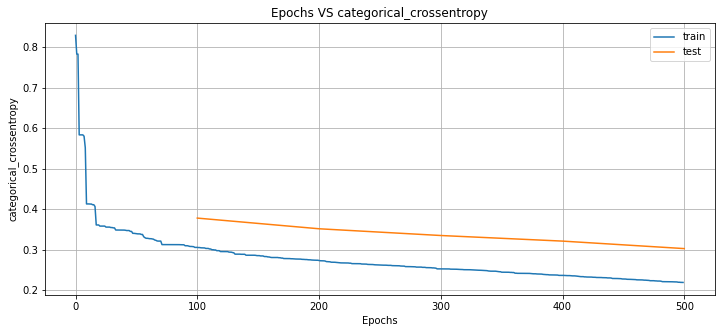

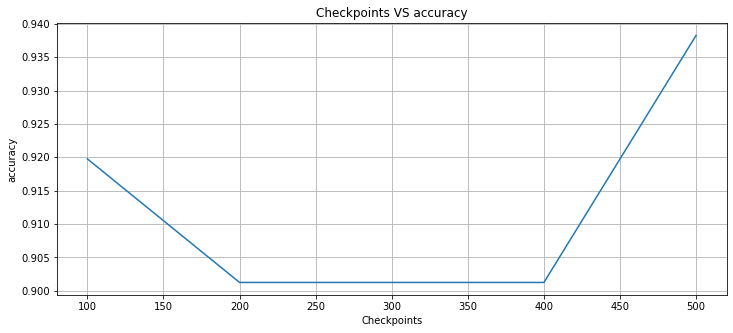

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9197530864197531, 'mean_square_error': 0.19509389477923508, 'categorical_crossentropy': 0.3776601155598958, 'precision': 0.8796296296296297, 'recall': 0.8796296296296297, 'f1': 0.8796296296296297, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 13, 'tn_hit': 17, 'fn_hit': 0}, 1: {'tp_hit': 13, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 3}, 2: {'tp_hit': 4, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 10}}, 'checkpoint': 100} 


{'accuracy': 0.9012345679012346, 'mean_square_error': 0.1905845177486043, 'categorical_crossentropy': 0.35129261016845703, 'precision': 0.8518518518518519, 'recall': 0.8518518518518519, 'f1': 0.8518518518518519, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 16, 'tn_hit': 14, 'fn_hit': 0}, 1: {'tp_hit': 11, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 5}, 2: {'tp_hit': 3, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 11}}, 'checkpoint': 200} 


{'accuracy': 0.9012345679012346, 'mean_square_error': 0.18179401357562622, 'categorical_crossentropy': 0.3346393726490162, 'precis

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[ 1.2278749  0.48559   -0.7224765  2.4733653  2.49812  ]
 bias: 2.1629202365875244

Neuron 1: weights:
[ 1.5259032  -1.7179542   0.13012624 -1.4537163  -2.4904613 ]
 bias: 2.2197086811065674

Neuron 2: weights:
[-2.6313555  1.9376392 -1.8865812 -2.3646388 -0.832261 ]
 bias: 2.046083688735962

Neuron 3: weights:
[ 0.36586723 -1.1789432  -2.3503954   1.5031781   2.5996568 ]
 bias: 1.736183762550354

$
Layer 2
Neuron 0: weights:
[-1.4446684   3.         -0.19222344  1.1080385 ]
 bias: 0.7152836322784424

Neuron 1: weights:
[-1.1641648 -0.5001934  1.1942945 -3.       ]
 bias: 2.721055746078491

Neuron 2: weights:
[ 1.1696098 -0.6138083 -2.8436348  2.0878026]
 bias: 0.7733240723609924

$

